# $k$-Nearest Neighbors Classification
> by [Yohann De Castro](https://ydecastro.github.io/) and [Aurélien Garivier](https://www.google.com/search?q=aur%C3%A9lien+garivier)

# Nearest Neighbors principle

Given a training dataset $\{(X_1, Y_1), \dots, (X_n, Y_n)\}$, the k-nearest neighbors classification consists in predicting, for $x \in \mathbb R^d$, the majority vote of the k-nearest neighbors of $x$. Formally, the predicted class is given by
$$
    h(x) \in \arg\max_{y \in \mathcal Y} \sum_{j=1}^k \mathbb 1_{Y_{(i)}=y},
$$
where the ranked labeled $\{Y_{(1)}, \dots, Y_{(n)}\}$ are such that $\|X_{(1)}-x\| \le \dots \le \|X_{(n)}-x\|$.

Below, some examples on Iris/Wine data set from Scikit Learn. 

> When do we osbserve under/over fitting?

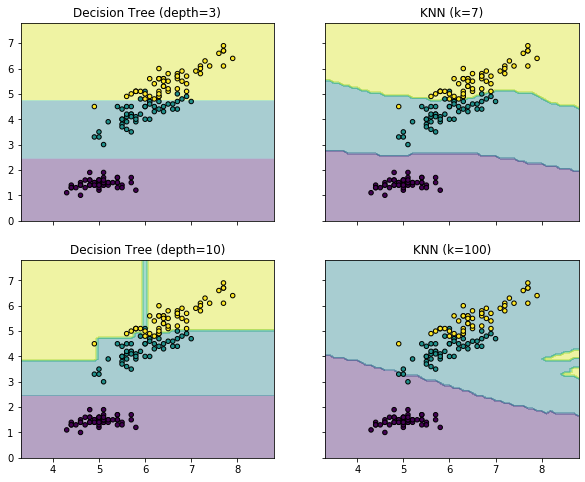

In [0]:
# Training classifiers
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = DecisionTreeClassifier(max_depth=10)
clf4 = KNeighborsClassifier(n_neighbors=100)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0,1]),
                        [clf1, clf2, clf3, clf4],
                        ['Decision Tree (depth=3)', 'KNN (k=7)', 'Decision Tree (depth=10)', 'KNN (k=100)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# Risk on the test set

> Plot the test risk for various values of the tunning parameters using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Text(0.5, 1.0, 'Test accuracy kNN')

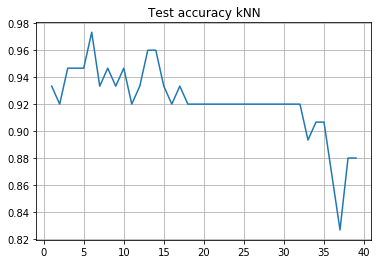

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

k_values = np.arange(1, 40)

# Answer:
score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
plt.plot(k_values, score)
plt.grid()
plt.title("Test accuracy kNN")

# The Cross-Validation procedure

Using the [crossval\_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function, find (and print) a good value for the number of nearest neighbors.

For this parameter, compare the crossvalidation score and the test accuracy.

In [0]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Answer
score = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    score.append(cross_val_score(clf, X_train, y_train).mean())
    
ik = np.argmax(score)
n_neighbors = k_values[ik]
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)

print("Neighbors:", n_neighbors)
print("Crossval score:", score[ik])
print("Test accuracy:", clf.score(X_test, y_test))

Neighbors: 9
Crossval score: 0.9800000000000001
Test accuracy: 0.88


# The Confusion matrix

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y, classes=None, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title='Confusion matrix'
    cmap=plt.cm.Blues
    
    cm = confusion_matrix(y, y_pred)
    
    if classes is None:
        classes = np.unique(y)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Unnormalized confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

> Compute the confusion matrix

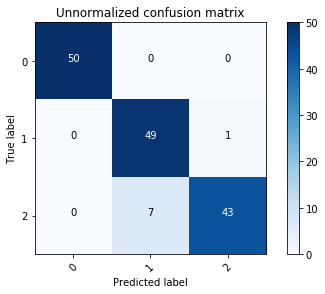

In [0]:
# Answer
y_pred = clf.predict(X)
plot_confusion_matrix(y_pred, y)